In [2]:
using HDF5
using PyCall
@pyimport matplotlib.animation as anim
using PyPlot
using Statistics
using Images
using ImageAnalysis 

In [3]:
include("/Users/rzhoufias.uni-frankfurt.de/Documents/Code/PIV/multi_quickPIV/src/multi_quickPIV.jl")

Main.multi_quickPIV

In [4]:
include("/Users/rzhoufias.uni-frankfurt.de/Documents/Code/PIV/multiscale_multistep_filter.jl")

multiscale_multigrid_gradient_segment (generic function with 1 method)

# Read .h5 single slice data

In [5]:
function read_h5(folder_path::String, data_name::String)
    h5open(folder_path, "r") do file
        read(file, data_name)
    end
end

read_h5 (generic function with 1 method)

In [14]:
file_path = "/Users/rzhoufias.uni-frankfurt.de/Documents/PhD_Franziska/Headon/featherbud_formation_chicken/headon_video1_layer5.h5"

mesenchym_img = read_h5(file_path, "data")

1024×1024×395 Array{Float32, 3}:
[:, :, 1] =
  635.0   533.0  1095.0  1276.0  1394.0  …  1363.0  2240.0  2722.0  1678.0
 1010.0   466.0   300.0  1288.0   274.0     3424.0  2372.0   867.0  1020.0
  196.0    32.0   571.0   140.0   380.0     2977.0  2713.0  3728.0  1879.0
  289.0   465.0   737.0   627.0   803.0     2736.0  3735.0  1268.0  2885.0
 1413.0  2006.0    53.0  1282.0    40.0     1647.0  2785.0   990.0  2732.0
  441.0   216.0  2477.0   927.0  1918.0  …  2622.0  1031.0  2103.0  1412.0
 1176.0   522.0  3124.0  1359.0   610.0     2434.0  2979.0  2193.0  2850.0
  840.0  1015.0  3771.0  2385.0  1983.0     1689.0  2554.0  3069.0  1940.0
  446.0  1943.0  2869.0  5536.0  1857.0     2996.0  2888.0   857.0  1227.0
  672.0  4602.0  6339.0  4214.0  2239.0     1961.0  1080.0   776.0  1672.0
 2788.0  2873.0  4787.0  2581.0  4482.0  …   846.0  1799.0   731.0   204.0
 2145.0  2883.0  5425.0  3626.0  2266.0       63.0   309.0   172.0    41.0
 5226.0  4677.0   610.0  2642.0  3982.0      377.0   70

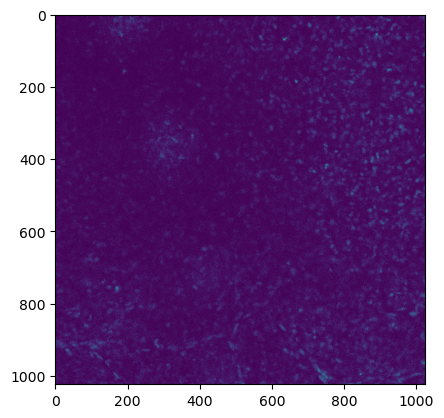

PyObject <matplotlib.image.AxesImage object at 0x1c507ce00>

In [15]:
PyPlot.imshow(mesenchym_img[:,:,100])

# Apply Mask.

In [38]:
# parameter for multiscale multistep filter 
grid_sizes = ( (7,7), )
scales     = ( ((4,4),(2,2)), ) 
steps      = ( ((1,1),(4,4)), ) 

Δ_low = 2600
α = 1.5

img1 = mesenchym_img[:,:,100]
img2 = mesenchym_img[:,:,105]

# One possible filtering with multiscale_multistep filter. 
img1_out = multiscale_multistep_filter( Float32.( img1 ), grid_sizes=grid_sizes, scales=scales, steps=steps )
img1_mask1 = img1_out .> ( img1 .+ Δ_low ) .^ α

img2_out = multiscale_multistep_filter( Float32.( img2 ), grid_sizes=grid_sizes, scales=scales, steps=steps )
img2_mask1 = img2_out .> ( img1 .+ Δ_low ) .^ α

hi 
hi 


1024×1024 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  1  0  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     

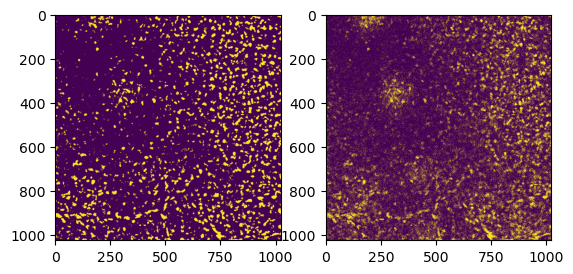

PyObject <matplotlib.image.AxesImage object at 0x1cb787ad0>

In [31]:
# simple filtering. 

img1_mask2 = img1 .>= 1000

subplot( 1, 2, 1 ); PyPlot.imshow(img1_mask1)
subplot(1, 2, 2); PyPlot.imshow(img1_mask2)

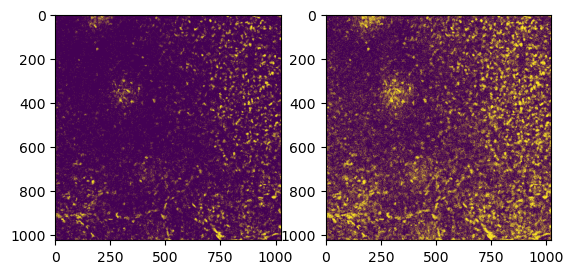

PyObject <matplotlib.image.AxesImage object at 0x1cb577410>

In [24]:
# Otsu threshold.

threshold = Images.otsu_threshold(img1)
img1_maskotsu = img1 .>= threshold

subplot( 1, 2, 1 ); PyPlot.imshow(img1_mask2)
subplot(1, 2, 2); PyPlot.imshow(img1_maskotsu)

# Do PIV for time period of 0 frame - 150 frame 

In this time period, the condensates are clear and forming. Could consider to cut the period into two parts, one from 0-100 and the other from 100-200 frames. 
Goal: Capture possbile cell movement dynamics and probably vorticity. 
Possible methods: pseudo trajectory for short time period. 

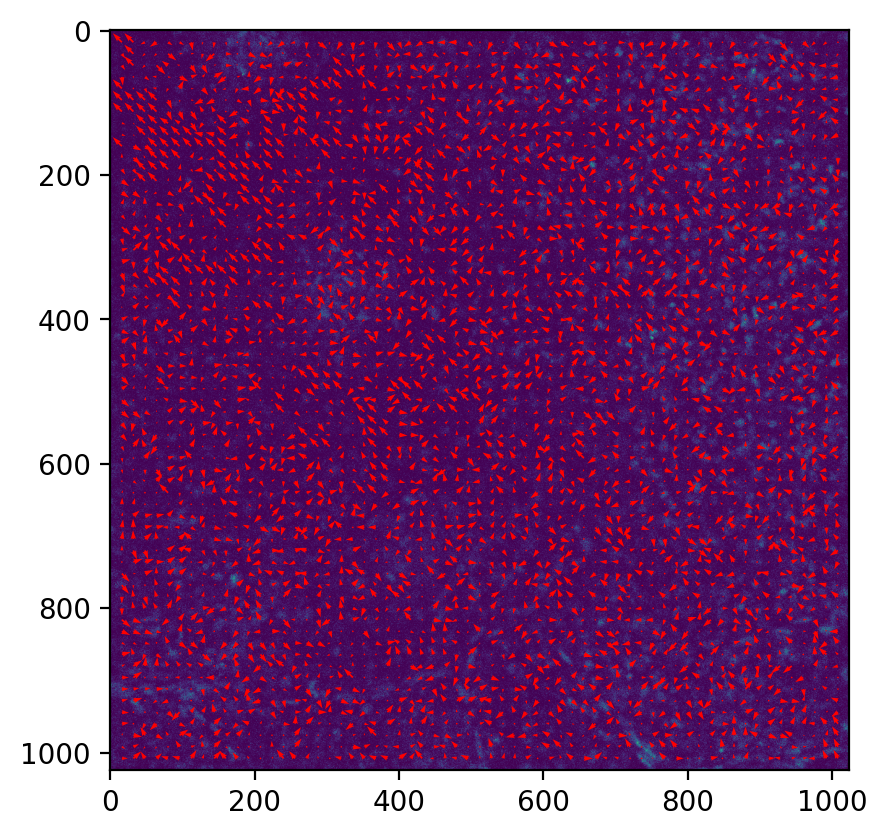

PyObject <matplotlib.quiver.Quiver object at 0x1cc000c80>

In [40]:
# paramters for PIV analysis
pivparams = multi_quickPIV.setPIVParameters(interSize=(32, 32), searchMargin=(64, 64), step=(16, 16), computeSN = true)
IA = multi_quickPIV._isize(pivparams)
ST = multi_quickPIV._step(pivparams)


VF, SN = multi_quickPIV.PIV( img1_mask1, img2_mask1, pivparams )

U = VF[ 1, :, : ]
# U.*= ( SN .> 1 )
V = VF[ 2, :, : ]
# V.*= ( SN .> 1 )
M = sqrt.( U .^ 2 .+ V .^ 2 )# Magnitude of the vectors.

# U[ M .> 5 ] .= NaN
# V[ M .> 5 ] .= NaN

ygrid = [ ( y - 1 )*ST[1] + div( IA[1], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]
xgrid = [ ( x - 1 )*ST[2] + div( IA[2], 2 ) for y in 1:size(U,1), x in 1:size(U,2) ]

PyPlot.figure( dpi=200 )
PyPlot.imshow( img1)
PyPlot.quiver( xgrid, ygrid, V, -U, color="red")